In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn import linear_model
from sklearn import preprocessing


In [267]:
df = pd.read_csv('Melbourne housing.csv')
df = df.drop_duplicates()
#df = df.dropna()
print(df.head())
print(df.shape)

       Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode      ...       Bathroom  Car  Landsize  \
0   3/9/2016       2.5    3067.0      ...            1.0  1.0     126.0   
1  3/12/2016       2.5    3067.0      ...            1.0  1.0     202.0   
2   4/2/2016       2.5    3067.0      ...            1.0  0.0     156.0   
3   4/2/2016       2.5    3067.0      ...            2.0  1.0       0.0   
4   4/3/2017       2.5    3067.0      ...            2.0  0.0     134.0   

   BuildingArea  YearBuilt         CouncilArea Lattitude  Longtitude  \
0           NaN        NaN

In [268]:
#checking the type for each column.  Can also use series.dtype, on individual columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34856 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34856 non-null object
Address          34856 non-null object
Rooms            34856 non-null int64
Type             34856 non-null object
Price            27247 non-null float64
Method           34856 non-null object
SellerG          34856 non-null object
Date             34856 non-null object
Distance         34855 non-null float64
Postcode         34855 non-null float64
Bedroom2         26639 non-null float64
Bathroom         26630 non-null float64
Car              26128 non-null float64
Landsize         23046 non-null float64
BuildingArea     13741 non-null float64
YearBuilt        15550 non-null float64
CouncilArea      34853 non-null object
Lattitude        26880 non-null float64
Longtitude       26880 non-null float64
Regionname       34853 non-null object
Propertycount    34853 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.9+ M

In [269]:
#splitting the data

#dropping unnecessary columns
pre_X = df.drop(['Price', 'Address', 'Method', 'SellerG', 'Date', 'Propertycount'], 1)

#getting dummy values for categorical data, and creating dataframe of the independent (predictor) values
X_df = pd.get_dummies(pre_X, columns=['Suburb', 'Regionname', 'Type', 'CouncilArea'])


#print(X_df.head())
print(X_df.shape)

(34856, 406)


In [270]:
#creating a new feature by Recoding the year built column to reflect and compare the age of the houses.
X_df['PropertyAge'] = 2019 - X_df['YearBuilt']


In [271]:
#checking for null values
X_df.isnull().sum()

Rooms                                             0
Distance                                          1
Postcode                                          1
Bedroom2                                       8217
Bathroom                                       8226
Car                                            8728
Landsize                                      11810
BuildingArea                                  21115
YearBuilt                                     19306
Lattitude                                      7976
Longtitude                                     7976
Suburb_Abbotsford                                 0
Suburb_Aberfeldie                                 0
Suburb_Airport West                               0
Suburb_Albanvale                                  0
Suburb_Albert Park                                0
Suburb_Albion                                     0
Suburb_Alphington                                 0
Suburb_Altona                                     0
Suburb_Alton

In [272]:
#taking care of missing data

#fixing missing data in Distance column
X_df['Distance'].ffill(axis=0, inplace=True)
print('Null values in Distance column: ', X_df['Distance'].isnull().sum())

#fixing missing data in Bedroom2 column
X_df['Bedroom2'].ffill(axis=0, inplace=True)
print('Null values in Bedroom2 column: ', X_df['Bedroom2'].isnull().sum())

#fixing missing data in Bathroom column
X_df['Bathroom'].ffill(axis=0, inplace=True)
print('Null values in Bathroom column: ', X_df['Bathroom'].isnull().sum())

#fixing missing data in Car column
X_df['Car'].ffill(axis=0, inplace=True)
print('Null values in Car column: ', X_df['Car'].isnull().sum())


#fixing missing data in postcode column
X_df['Postcode'].ffill(axis=0, inplace=True)
print('Null values in Postcode column: ', X_df['Postcode'].isnull().sum())

#fixing missing data in YearBuilt column
X_df['YearBuilt'].bfill(axis=0, inplace=True)
print('Null values in YearBuilt column: ', X_df['YearBuilt'].isnull().sum())

#fixing missing data in YearBuilt column
X_df['Lattitude'].bfill(axis=0, inplace=True)
print('Null values in Lattitude column: ', X_df['YearBuilt'].isnull().sum())

#fixing missing data in YearBuilt column
X_df['Longtitude'].bfill(axis=0, inplace=True)
print('Null values in Longtitude column: ', X_df['YearBuilt'].isnull().sum())

#fixing missing data in PropertyAge column
X_df['PropertyAge'].bfill(axis=0, inplace=True)
print('Null values in PropertyAge column: ', X_df['PropertyAge'].isnull().sum())


#fixing missing data in Landsize and BuildingArea columns
X_df['Landsize'].fillna(np.mean(X_df['Landsize']), inplace=True)
X_df['BuildingArea'].fillna(np.mean(X_df['BuildingArea']), inplace=True)

Null values in Distance column:  0
Null values in Bedroom2 column:  0
Null values in Bathroom column:  0
Null values in Car column:  0
Null values in Postcode column:  0
Null values in YearBuilt column:  0
Null values in Lattitude column:  0
Null values in Longtitude column:  0
Null values in PropertyAge column:  0


In [273]:
#changing dtype for bathroom column
X_df['Bathroom'] = X_df['Bathroom'].astype(int)
print(X_df['Bathroom'].dtype)

#checking for zeros in bathroom column
np.where(X_df['Bathroom'] == 0)



int32


(array([  228,   481,   845,  1009,  1549,  1772,  1784,  2716,  2717,
         2853,  3717,  3812,  4434,  4567,  4611,  4637,  4638,  5590,
         5827,  6242,  6249,  6263,  6713,  6714,  8106,  8107,  9132,
         9174,  9280,  9389, 10485, 10486, 10487, 10488, 10518, 10519,
        10650, 10651, 10879, 10915, 11174, 11193, 11301, 11651, 12217,
        13058, 13059, 13181, 13515, 13516, 14870, 16063, 16064, 16065,
        16321, 17717, 17864, 17865, 18303], dtype=int64),)

In [274]:
#replace the zeros in the bathroom column with 1
X_df['Bathroom'] = X_df['Bathroom'].replace(0,1)

#re-checking for zeros in Bathroom column
print(np.where(X_df['Bathroom'] == 0))

(array([], dtype=int64),)


In [275]:
#changing the dtype for the landsize column
X_df['Landsize'] = X_df['Landsize'].astype(int)

#checking for zeros in landsize column
print(np.where(X_df['Landsize'] == 0))
print(X_df['Landsize'][3])



(array([    3,    17,    23, ..., 19724, 19733, 19735], dtype=int64),)
0


In [276]:
#replacing the zeros with landsize average
X_df['Landsize'] = X_df['Landsize'].replace(0, np.mean(X_df['Landsize']))

print('Number of zeros in Landsize after replacing: ', np.where(X_df['Landsize'] == 0))

Number of zeros in Landsize after replacing:  (array([], dtype=int64),)


In [277]:
#changing the dtype for the BuildingArea column
X_df['BuildingArea'] = X_df['BuildingArea'].astype(int)

#checking for zeros in BuildingArea column
print(np.where(X_df['BuildingArea'] == 0))



(array([ 7211, 16539, 19774, 19839, 20037, 20222, 20261, 20575, 21154,
       21509, 21560, 21741, 21857, 21867, 21953, 22039, 22209, 22506,
       22680, 22930, 22993, 23021, 23084, 23114, 23126, 23158, 23241,
       23249, 23320, 23377, 23378, 23653, 23689, 24115, 24127, 24195,
       24204, 24240, 24257, 24275, 24343, 24601, 24638, 25076, 25085,
       25319, 25351, 25375, 25411, 25566, 25707, 25900, 26099, 26342,
       26617, 26632, 26837, 27440, 27563, 27586, 27628, 27921, 28726,
       28780, 29455, 30913, 31463, 31508, 31540, 31716, 32402, 32839,
       32935, 33396, 33659, 33898, 34082], dtype=int64),)


In [278]:
#replacing the zeros with BuildingArea average
X_df['BuildingArea'] = X_df['BuildingArea'].replace(0, np.mean(X_df['BuildingArea']))


print('Number of zeros in BuildingArea after replacing: ', np.where(X_df['BuildingArea'] == 0))

Number of zeros in BuildingArea after replacing:  (array([], dtype=int64),)


In [279]:
df_null_values = X_df.isnull().sum().sum()

print('Total Null values in the independent variables after fixing the missing data: ', df_null_values)

Total Null values in the independent variables after fixing the missing data:  0


In [280]:
#checking for null values in dependent variable
null_Y = df['Price'].isnull().sum()

print('Number of null values in dependent variable: ', null_Y)

Number of null values in dependent variable:  7609


In [281]:
#fixing null values in dependent variable, Y
df['Price'].bfill(axis=0, inplace=True)
print('Null values in dependent variable: ', df['Price'].isnull().sum())

Null values in dependent variable:  0


(array([2.3918e+04, 9.1900e+03, 1.3400e+03, 2.7100e+02, 1.0100e+02,
        2.8000e+01, 5.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([   85000.,  1196500.,  2308000.,  3419500.,  4531000.,  5642500.,
         6754000.,  7865500.,  8977000., 10088500., 11200000.]),
 <a list of 10 Patch objects>)

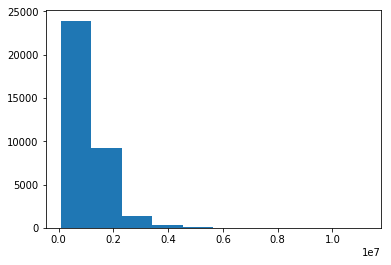

In [282]:
#distribution of dependent variable
plt.hist(df['Price'])

In [283]:
#performing a log distribution on dependent varaible and assigning it to  variable Y
Y = df['Price']
log_Y = np.log(df['Price'])

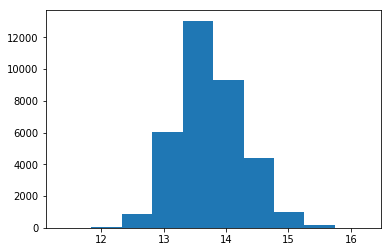

In [284]:
plt.hist(log_Y)
plt.show()

### The relationship between the dependent variable and many of the independent variables are non-linear.  So I will perform transformations to capture the non-linearity between the independent and dependent variables.

In [285]:
#Rooms Column

#changing dtype of Rooms column
X_df['Rooms'] = X_df['Rooms'].astype(int)

print('Number of zero values in Rooms: ', np.where(X_df['Rooms'] == 0))
print()


#transforming Rooms
X_df['RoomsTransformed'] = np.log(X_df['Rooms'])


#checking to see if Roomslog has any null or nan values
print("Number of null values in RoomsTransformed: ", X_df['RoomsTransformed'].isnull().sum().sum())
print()

#checking for zeros in RoomsTransformed
print('Number of zero values in RoomsTransformed: ', np.where(X_df['RoomsTransformed'] == 0))
print()

#checking for infinity values in RoomsTransformed column
print('Infinity Values in RoomsTransformed: ', np.isinf(X_df['RoomsTransformed']).sum())

Number of zero values in Rooms:  (array([], dtype=int64),)

Number of null values in RoomsTransformed:  0

Number of zero values in RoomsTransformed:  (array([   17,    22,    27, ..., 34734, 34735, 34843], dtype=int64),)

Infinity Values in RoomsTransformed:  0


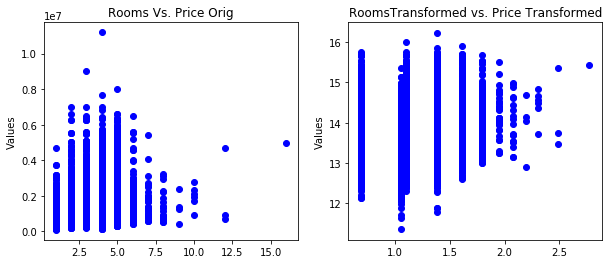

In [286]:
#replacing Zeros in RoomsTransformed
X_df['RoomsTransformed'] = X_df['RoomsTransformed'].replace(0, np.mean(X_df['RoomsTransformed']))


#plotting Rooms Vs. Price
#setting the overall size of the plot figure
plt.figure(figsize=(10, 4))

#making a plot figure that will have one row with two plots in each row
plt.subplot(1, 2, 1)
plt.scatter(x=X_df['Rooms'], y=df['Price'], color='blue')
plt.ylabel('Values')
plt.title('Rooms Vs. Price Orig')

plt.subplot(1, 2, 2)
plt.scatter(x=X_df['RoomsTransformed'], y=log_Y, color='blue')
plt.ylabel('Values')
plt.title('RoomsTransformed vs. Price Transformed')
plt.show()

In [287]:
#YearBuilt Column

#changing dtype of YearBuilt column
X_df['YearBuilt'] = X_df['YearBuilt'].astype(int)

print('Number of zero values in YearBuilt: ', np.where(X_df['YearBuilt'] == 0))
print()

#transforming YearBuilt
X_df['YearBuiltTransformed'] = np.log(X_df['YearBuilt'])


#checking to see if YearbuiltTransformed has any null or nan values
print("Number of null values in YearBuiltTransformed: ", X_df['YearBuiltTransformed'].isnull().sum().sum())
print()

#checking for zeros in YearBuiltTransformed
print('Number of zero values in YearBuiltTransformed: ', np.where(X_df['YearBuiltTransformed'] == 0))
print()

#checking for infinity values in YearBuiltTransformed column
print('Infinity Values in YearBuiltTransformed: ', np.isinf(X_df['YearBuiltTransformed']).sum())

Number of zero values in YearBuilt:  (array([], dtype=int64),)

Number of null values in YearBuiltTransformed:  0

Number of zero values in YearBuiltTransformed:  (array([], dtype=int64),)

Infinity Values in YearBuiltTransformed:  0


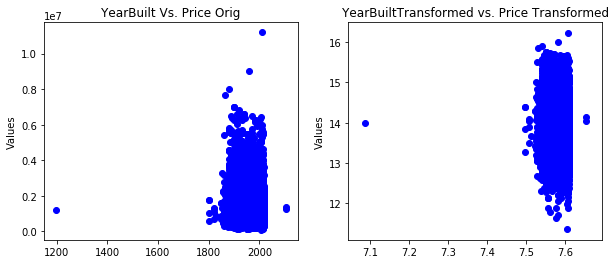

In [288]:

#plotting YearBuilt Vs. Price
#setting the overall size of the plot figure
plt.figure(figsize=(10, 4))

#making a plot figure that will have one row with two plots in each row
plt.subplot(1, 2, 1)
plt.scatter(x=X_df['YearBuilt'], y=df['Price'], color='blue')
plt.ylabel('Values')
plt.title('YearBuilt Vs. Price Orig')

plt.subplot(1, 2, 2)
plt.scatter(x=X_df['YearBuiltTransformed'], y=log_Y, color='blue')
plt.ylabel('Values')
plt.title('YearBuiltTransformed vs. Price Transformed')
plt.show()

In [289]:
#PropertyAge Column

#changing dtype of PropertyAge column
X_df['PropertyAge'] = X_df['PropertyAge'].astype(int)

print('Number of zero values in PropertyAge: ', np.where(X_df['PropertyAge'] == 0))
print()


#transforming PropertyAge
X_df['PropertyAgeTransformed'] = np.log(X_df['PropertyAge'])


#checking to see if PropertyAgeTransformed has any null or nan values
print("Number of null values in PropertyAgeTransformed: ", X_df['PropertyAgeTransformed'].isnull().sum().sum())
print()

#checking for zeros in PropertyAgeTransformed
print('Number of zero values in PropertyAgeTransformed: ', np.where(X_df['PropertyAgeTransformed'] == 0))
print()

#checking for infinity values in PropertyAgeTransformed column
print('Infinity Values in PropertyAgeTransformed: ', np.isinf(X_df['PropertyAgeTransformed']).sum())

Number of zero values in PropertyAge:  (array([33029, 33030, 33031, 33032], dtype=int64),)

Number of null values in PropertyAgeTransformed:  2

Number of zero values in PropertyAgeTransformed:  (array([ 2095,  2096, 31561, 31562, 31563, 34759, 34850, 34851, 34852],
      dtype=int64),)

Infinity Values in PropertyAgeTransformed:  4


C:\Users\sajee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
C:\Users\sajee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


Number of null values in PropertyAgeTransformed:  0


Number of infinity values in PropertyAge after fixing:  0


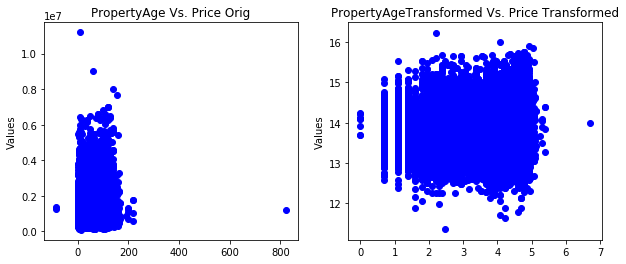

In [290]:
#fixing null values in PropertyAgelog
X_df['PropertyAgeTransformed'].ffill(axis=0, inplace=True)
print("Number of null values in PropertyAgeTransformed: ", X_df['PropertyAgeTransformed'].isnull().sum().sum())
print()

#replacing the infinite values
X_df['PropertyAgeTransformed'] = X_df['PropertyAgeTransformed'].replace([np.inf, -np.inf], 3)
print()

#rechecking for infinite values
print('Number of infinity values in PropertyAge after fixing: ', np.isinf(X_df['PropertyAgeTransformed']).sum())


#Plotting PropertyAge
#setting the overall size of the plot figure
plt.figure(figsize=(10, 4))

#making a plot figure that will have one row with two plots in each row. The third nummber represents the plot number.
plt.subplot(1, 2, 1)
plt.scatter(x=X_df['PropertyAge'], y=df['Price'], color='blue')
plt.ylabel('Values')
plt.title('PropertyAge Vs. Price Orig')

plt.subplot(1, 2, 2)
plt.scatter(x=X_df['PropertyAgeTransformed'], y=log_Y, color='blue')
plt.ylabel('Values')
plt.title('PropertyAgeTransformed Vs. Price Transformed')
plt.show()


In [291]:
#Bathroom Column

#changing dtype of Bathroom column
X_df['Bathroom'] = X_df['Bathroom'].astype(int)

print('Number of zero values in Bathroom: ', np.where(X_df['Bathroom'] == 0))
print()


#transforming Bathroom
X_df['BathroomTransformed'] = np.log(X_df['Bathroom'])


#checking to see if BathroomTransformed has any null or nan values
print("Number of null values in BathroomTransformed: ", X_df['BathroomTransformed'].isnull().sum().sum())
print()

#checking for zeros in BathroomTransformed
print('Number of zero values in BathroomTransformed: ', np.where(X_df['BathroomTransformed'] == 0))
print()

#checking for infinity values in BathroomTransformed column
print('Infinity Values in BathroomTransformed: ', np.isinf(X_df['BathroomTransformed']).sum())

Number of zero values in Bathroom:  (array([], dtype=int64),)

Number of null values in BathroomTransformed:  0

Number of zero values in BathroomTransformed:  (array([    0,     1,     2, ..., 34853, 34854, 34855], dtype=int64),)

Infinity Values in BathroomTransformed:  0


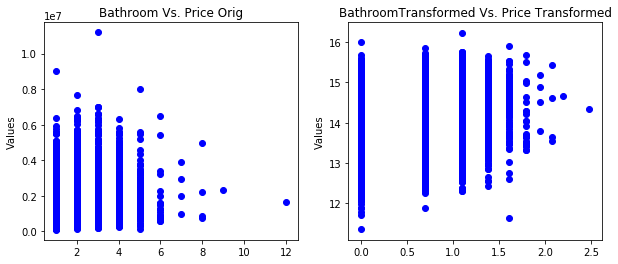

In [292]:

#setting the overall size of the plot figure
plt.figure(figsize=(10, 4))

#making a plot figure that will have one row with two plots in each row. The third nummber represents the plot number.
plt.subplot(1, 2, 1)
plt.scatter(x=X_df['Bathroom'], y=df['Price'], color='blue')
plt.ylabel('Values')
plt.title('Bathroom Vs. Price Orig')

plt.subplot(1, 2, 2)
plt.scatter(x=X_df['BathroomTransformed'], y=log_Y, color='blue')
plt.ylabel('Values')
plt.title('BathroomTransformed Vs. Price Transformed')
plt.show()


In [293]:
#Landsize Column

#changing dtype of Landsize column
X_df['Landsize'] = X_df['Landsize'].astype(int)

print('Number of zero values in Landsize: ', np.where(X_df['Landsize'] == 0))
print()


#transforming Landsize
X_df['LandsizeTransformed'] = np.log(X_df['Landsize'])


#checking to see if LandsizeTransformed has any null or nan values
print("Number of null values in LandsizeTransformed: ", X_df['LandsizeTransformed'].isnull().sum().sum())
print()

#checking for zeros in LandsizeTransformed
print('Number of zero values in LandsizeTransformed: ', np.where(X_df['LandsizeTransformed'] == 0))
print()

#checking for infinity values in LandsizeTransformed column
print('Infinity Values in LandsizeTransformed: ', np.isinf(X_df['LandsizeTransformed']).sum())

Number of zero values in Landsize:  (array([], dtype=int64),)

Number of null values in LandsizeTransformed:  0

Number of zero values in LandsizeTransformed:  (array([ 5489, 17435, 17559], dtype=int64),)

Infinity Values in LandsizeTransformed:  0


Number of zero values in LandsizeTransformed:  (array([], dtype=int64),)



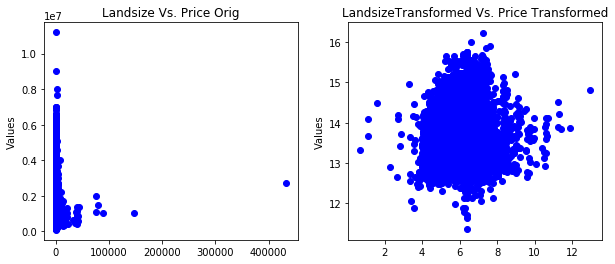

In [294]:
#replacing Zeros in LandsizeTransformed
X_df['LandsizeTransformed'] = X_df['LandsizeTransformed'].replace(0, np.mean(X_df['LandsizeTransformed']))

#re-checking for zeros in LandsizeTransformed
print('Number of zero values in LandsizeTransformed: ', np.where(X_df['LandsizeTransformed'] == 0))
print()

#setting the overall size of the plot figure
plt.figure(figsize=(10, 4))

#making a plot figure that will have one row with two plots in each row. The third nummber represents the plot number.
plt.subplot(1, 2, 1)
plt.scatter(x=X_df['Landsize'], y=df['Price'], color='blue')
plt.ylabel('Values')
plt.title('Landsize Vs. Price Orig')

plt.subplot(1, 2, 2)
plt.scatter(x=X_df['LandsizeTransformed'], y=log_Y, color='blue')
plt.ylabel('Values')
plt.title('LandsizeTransformed Vs. Price Transformed')
plt.show()


In [295]:
#BuildingArea Column

#changing dtype of BuildingArea column
X_df['BuildingArea'] = X_df['BuildingArea'].astype(int)

print('Number of zero values in BuildingArea: ', np.where(X_df['BuildingArea'] == 0))
print()


#transforming BuildingArea
X_df['BuildingAreaTransformed'] = np.log(X_df['BuildingArea'])


#checking to see if BuildingAreaTransformed has any null or nan values
print("Number of null values in BuildingAreaTransformed: ", X_df['BuildingAreaTransformed'].isnull().sum().sum())
print()

#checking for zeros in BuildingAreaTransformed
print('zero values in BuildingAreaTransformed: ', np.where(X_df['BuildingAreaTransformed'] == 0))
print()

#checking for infinity values in BuildingAreaTransformed column
print('Infinity Values in BuildingAreaTransformed: ', np.isinf(X_df['BuildingAreaTransformed']).sum())

Number of zero values in BuildingArea:  (array([], dtype=int64),)

Number of null values in BuildingAreaTransformed:  0

zero values in BuildingAreaTransformed:  (array([ 2301,  3446,  7269,  8787,  9554, 13553, 13586, 18832, 19273,
       19297, 19342, 19473, 23508, 24868, 29533], dtype=int64),)

Infinity Values in BuildingAreaTransformed:  0


Number of zero values in BuildingAreaTransformed:  (array([], dtype=int64),)



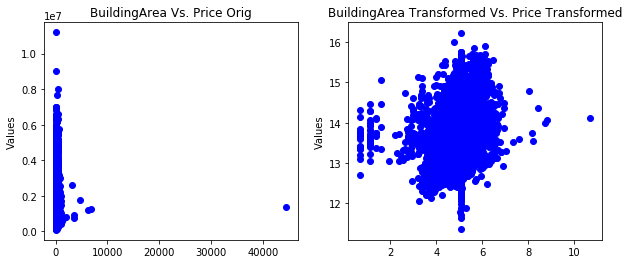

In [296]:
#replacing Zeros in BuildingAreaTransformed
X_df['BuildingAreaTransformed'] = X_df['BuildingAreaTransformed'].replace(0, np.mean(X_df['BuildingAreaTransformed']))

#re-checking for zeros in BuildingAreaTransformed
print('Number of zero values in BuildingAreaTransformed: ', np.where(X_df['BuildingAreaTransformed'] == 0))
print()

#setting the overall size of the plot figure
plt.figure(figsize=(10, 4))

#making a plot figure that will have one row with two plots in each row. The third nummber represents the plot number.
plt.subplot(1, 2, 1)
plt.scatter(x=X_df['BuildingArea'], y=df['Price'], color='blue')
plt.ylabel('Values')
plt.title('BuildingArea Vs. Price Orig')

plt.subplot(1, 2, 2)
plt.scatter(x=X_df['BuildingAreaTransformed'], y=log_Y, color='blue')
plt.ylabel('Values')
plt.title('BuildingArea Transformed Vs. Price Transformed')
plt.show()


In [297]:
#Postcode Column

#changing dtype of Postcode column
X_df['Postcode'] = X_df['Postcode'].astype(int)

print('Number of zero values in Postcode: ', np.where(X_df['Postcode'] == 0))
print()


#transforming Postcode
X_df['PostcodeTransformed'] = np.log(X_df['Postcode'])


#checking to see if PostcodeTransformed has any null or nan values
print("Number of null values in PostcodeTransformed: ", X_df['PostcodeTransformed'].isnull().sum().sum())
print()

#checking for zeros in PostcodeTransformed
print('Number of zero values in PostcodeTransformed: ', np.where(X_df['PostcodeTransformed'] == 0))
print()

#checking for infinity values in PostcodeTransformed column
print('Infinity Values in PostcodeTransformed: ', np.isinf(X_df['PostcodeTransformed']).sum())

Number of zero values in Postcode:  (array([], dtype=int64),)

Number of null values in PostcodeTransformed:  0

Number of zero values in PostcodeTransformed:  (array([], dtype=int64),)

Infinity Values in PostcodeTransformed:  0


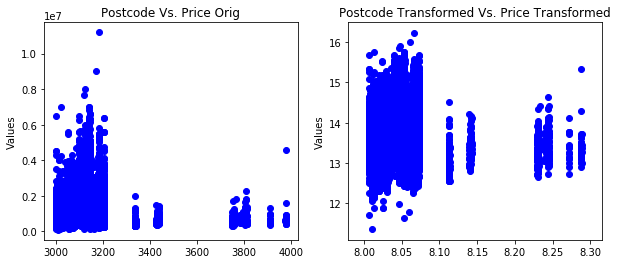

In [298]:

#replacing the infinite values
#X_df['PostcodeTransformed'] = X_df['PostcodeTransformed'].replace([np.inf, -np.inf], 8)

#Plotting postcode
#setting the overall size of the plot figure
plt.figure(figsize=(10, 4))

#making a plot figure that will have one row with two plots in each row. The third nummber represents the plot number.
plt.subplot(1, 2, 1)
plt.scatter(x=X_df['Postcode'], y=df['Price'], color='blue')
plt.ylabel('Values')
plt.title('Postcode Vs. Price Orig')

plt.subplot(1, 2, 2)
plt.scatter(x=X_df['PostcodeTransformed'], y=log_Y, color='blue')
plt.ylabel('Values')
plt.title('Postcode Transformed Vs. Price Transformed')
plt.show()


In [299]:
#Bedroom2 Column

#changing dtype of Bedroom2 column
X_df['Bedroom2'] = X_df['Bedroom2'].astype(int)

print('Number of zero values in Bedroom2: ', np.where(X_df['Bedroom2'] == 0))
print()

#transforming Bedroom2
X_df['Bedroom2Transformed'] = np.log(X_df['Bedroom2'])


#checking to see if Bedroom2Transformed has any null or nan values
print("Number of null values in Bedroom2Transformed: ", X_df['Bedroom2Transformed'].isnull().sum().sum())
print()

#checking for zeros in Bedroom2Transformed
print('Number of zero values in Bedroom2Transformed: ', np.where(X_df['Bedroom2Transformed'] == 0))
print()

#checking for infinity values in Bedroom2Transformed column
print('Infinity Values in Bedroom2Transformed: ', np.isinf(X_df['Bedroom2Transformed']).sum())

Number of zero values in Bedroom2:  (array([  218,  1390,  1424,  1549,  3717,  3812,  5547, 10107, 10108,
       11193, 11234, 11235, 12013, 12217, 13558, 14708, 15294, 15295,
       16321, 18303], dtype=int64),)

Number of null values in Bedroom2Transformed:  0

Number of zero values in Bedroom2Transformed:  (array([   17,    29,    48, ..., 32703, 33094, 34474], dtype=int64),)

Infinity Values in Bedroom2Transformed:  20


C:\Users\sajee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


Number of zero values in Bedroom2:  (array([], dtype=int64),)

Number of zero values in Bedroom2Transformed:  (array([], dtype=int64),)

infinity values in Bedroom2Transformed:  0


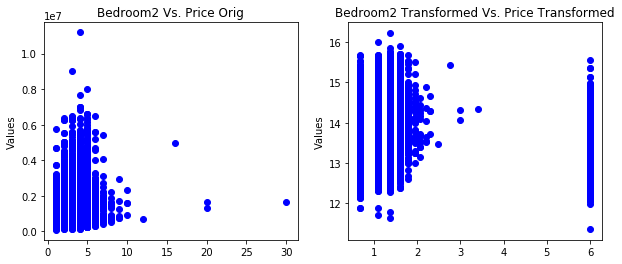


Number of null values in Bedroom2Transformed:  0
zero values in Bedroom2Transformed:  (array([], dtype=int64),)
infinity values in Bedroom2Transformed:  0


In [300]:
#replacing Zeros in Bedroom2
X_df['Bedroom2'] = X_df['Bedroom2'].replace(0, np.mean(X_df['Bedroom2']))

#re-checking for zeros in Bedroom2
print('Number of zero values in Bedroom2: ', np.where(X_df['Bedroom2'] == 0))
print()

#replacing Zeros in Bedroom2Transformed
X_df['Bedroom2Transformed'] = X_df['Bedroom2Transformed'].replace(0, np.mean(X_df['Bedroom2Transformed']))

#re-checking for zeros in Bedroom2Transformed
print('Number of zero values in Bedroom2Transformed: ', np.where(X_df['Bedroom2Transformed'] == 0))
print()

#replacing the infinite values
X_df['Bedroom2Transformed'] = X_df['Bedroom2Transformed'].replace([np.inf, -np.inf], 6)

#rechecking for infinity values in Bedroom2Transformed
print('infinity values in Bedroom2Transformed: ', np.isinf(X_df['Bedroom2Transformed']).sum())

#setting the overall size of the plot figure
plt.figure(figsize=(10, 4))

#making a plot figure that will have one row with two plots in each row. The third nummber represents the plot number.
plt.subplot(1, 2, 1)
plt.scatter(x=X_df['Bedroom2'], y=df['Price'], color='blue')
plt.ylabel('Values')
plt.title('Bedroom2 Vs. Price Orig')

plt.subplot(1, 2, 2)
plt.scatter(x=X_df['Bedroom2Transformed'], y=log_Y, color='blue')
plt.ylabel('Values')
plt.title('Bedroom2 Transformed Vs. Price Transformed')
plt.show()

print()

#checking to see if Bedroom2Transformed has any null or nan values
print("Number of null values in Bedroom2Transformed: ", X_df['Bedroom2Transformed'].isnull().sum().sum())

#checking for zeros in Bedroom2Transformed column
print('zero values in Bedroom2Transformed: ', np.where(X_df['Bedroom2Transformed'] == 0))

#checking for infinity values in Bedroom2Transformed column
print('infinity values in Bedroom2Transformed: ', np.isinf(X_df['Bedroom2Transformed']).sum())


In [301]:
#Car Column

#changing dtype of Car column
X_df['Car'] = X_df['Car'].astype(int)

print('Number of zero values in Car: ', np.where(X_df['Car'] == 0))
print()

#transforming Car
X_df['CarTransformed'] = np.log(X_df['Car'])


#checking to see if CarTransformed has any null or nan values
print("Number of null values in CarTransformed: ", X_df['CarTransformed'].isnull().sum().sum())
print()

#checking for zeros in CarTransformed
print('Number of zero values in CarTransformed: ', np.where(X_df['CarTransformed'] == 0))
print()

#checking for infinity values in CarTransformed column
print('Infinity Values in CarTransformed: ', np.isinf(X_df['CarTransformed']).sum())

Number of zero values in Car:  (array([    2,     4,    10, ..., 34769, 34802, 34855], dtype=int64),)

Number of null values in CarTransformed:  0

Number of zero values in CarTransformed:  (array([    0,     1,     3, ..., 34840, 34841, 34852], dtype=int64),)

Infinity Values in CarTransformed:  2069


C:\Users\sajee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


infinity values in CarTransformed:  0


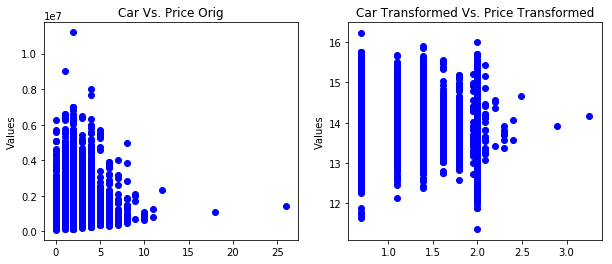


Number of null values in CarTransformed:  0


In [302]:
#replace the zeros in the CarTransformed column with 2
X_df['CarTransformed'] = X_df['CarTransformed'].replace(0,2)

#replacing the infinite values CarTransformed
X_df['CarTransformed'] = X_df['CarTransformed'].replace([np.inf, -np.inf], 2)

#rechecking for infinity values in CarTransformed
print('infinity values in CarTransformed: ', np.isinf(X_df['CarTransformed']).sum())


#setting the overall size of the plot figure
plt.figure(figsize=(10, 4))

#making a plot figure that will have one row with two plots in each row. The third nummber represents the plot number.
plt.subplot(1, 2, 1)
plt.scatter(x=X_df['Car'], y=df['Price'], color='blue')
plt.ylabel('Values')
plt.title('Car Vs. Price Orig')

plt.subplot(1, 2, 2)
plt.scatter(x=X_df['CarTransformed'], y=log_Y, color='blue')
plt.ylabel('Values')
plt.title('Car Transformed Vs. Price Transformed')
plt.show()

print()

#checking to see if PostcodeTransformed has any null or nan values
print("Number of null values in CarTransformed: ", X_df['CarTransformed'].isnull().sum().sum())

In [303]:
# normalize the data attributes
normalized_X = preprocessing.normalize(X_df)

In [241]:
#creating a new feature by averaging BuildingArea and Landsize
#X_df['BuildingLand'] = (X_df['BuildingArea'] + X_df['Landsize']) / 2

#print(X_df['BuildingLand'])

In [243]:
#BuildingLand Column

#changing dtype of BuildingLand column
#X_df['BuildingLand'] = X_df['BuildingLand'].astype(int)

#print('Number of zero values in BuildingLand: ', np.where(X_df['BuildingLand'] == 0))
print()

#transforming Car
#X_df['BuildingLandTransformed'] = np.log(X_df['BuildingLand'])


#checking to see if BuildingLandTransformed has any null or nan values
#print("Number of null values in BuildingLandTransformed: ", X_df['BuildingLandTransformed'].isnull().sum().sum())
print()

#checking for zeros in BuildingLandTransformed
#print('Number of zero values in BuildingLandTransformed: ', np.where(X_df['BuildingLandTransformed'] == 0))
print()

#checking for infinity values in BuildingLandTransformed column
#print('Infinity Values in BuildingLandTransformed: ', np.isinf(X_df['BuildingLandTransformed']).sum())

In [244]:
#Plotting BuildingLand

#setting the overall size of the plot figure
#plt.figure(figsize=(10, 4))

#making a plot figure that will have one row with two plots in each row. The third nummber represents the plot number.
#plt.subplot(1, 2, 1)
#plt.scatter(x=X_df['BuildingLand'], y=df['Price'], color='blue')
#plt.ylabel('Values')
#plt.title('BuildingLand Vs. Price Orig')

#plt.subplot(1, 2, 2)
#plt.scatter(x=X_df['BuildingLandTransformed'], y=log_Y, color='blue')
#plt.ylabel('Values')
#plt.title(' BuildingLandTransformed Vs. Price Transformed')
#plt.show()


In [304]:
#initial set of train and test groups, before applying SelectKBest and PCA.

train_X, test_X, train_Y, test_Y = train_test_split(X_df, log_Y, test_size=.30, random_state=10)

#checking to see where the nan values are.  Note: I used sum because array was too large to view every observation.
#0 implies false, 1 implies true
print(np.isnan(train_Y).any())
print(np.isnan(train_X).any().sum())
print(np.isnan(test_Y).any())
print(np.isnan(test_X).any().sum())

#correcting for nans
#np.nan_to_num(train_Y)
#np.nan_to_num(test_Y)

False
0
False
0


### Simple Ridge Regression model:

In [305]:
#initializing and fitting the ridge regression model, after pca

# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced. Note that by convention, the
# intercept is not regularized. Since we standardized the data
# earlier, the intercept should be equal to zero and can be dropped.

ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
ridgeregr.fit(train_X, train_Y)
print('R squared: ', ridgeregr.score(test_X, test_Y))
params = ridgeregr.coef_
print(params)
print()
ridgeregr_cvs = cross_val_score(ridgeregr, X_df, log_Y, cv=10)
print(ridgeregr_cvs)
print()
print('Average cross validated score of the ridge regression is: ', np.mean(ridgeregr_cvs))

R squared:  0.5732987429222938
[ 1.85639775e-01 -2.62600262e-02  1.27754040e-04 -1.98242184e-02
 -2.30277377e-02  1.78764337e-02  1.04134947e-06 -3.19786422e-05
 -2.99591430e-04 -1.05571246e-01  6.35549177e-02 -7.08836232e-02
  1.34482298e-01 -8.29671189e-02 -1.42453966e-03  2.68906810e-01
 -5.81870905e-03  1.67567204e-01  8.94104927e-02 -9.06033664e-02
 -1.19436110e-01 -4.89304261e-02 -9.52092750e-03 -5.44288440e-02
  5.46143281e-02 -2.69024667e-02  6.71792499e-02 -5.03411015e-02
  3.02757510e-02 -1.20071332e-01  1.38455303e-02 -1.76715597e-02
 -4.47004661e-02  1.58397505e-01  9.72302905e-02  2.26307151e-02
  6.94868198e-02  1.29005068e-01 -9.64562036e-03  7.53737508e-02
  1.03513111e-01 -9.80516390e-02  1.49676490e-01  9.40208561e-02
  8.45303988e-02  1.37418952e-01  9.17952365e-02 -4.46044945e-03
 -1.04680487e-01  1.20955396e-01  6.68902839e-02  0.00000000e+00
  1.23425905e-01 -1.07483335e-01  8.58611357e-03  2.12249513e-01
 -3.22083600e-02 -1.40037353e-01  8.31705705e-04  8.3000284

### The basic ridge regression model with the full data, after some  preprocessing, gave us an R squared of 56%. Next I will apply PCA, in the hopes of improving the R squared value.

                 Rooms  Distance  Postcode  Bedroom2  Bathroom       Car  \
Rooms         1.000000  0.271513  0.085890  0.946755  0.611875  0.393880   
Distance      0.271513  1.000000  0.481567  0.269528  0.126168  0.241831   
Postcode      0.085890  0.481567  1.000000  0.089292  0.120079  0.067885   
Bedroom2      0.946755  0.269528  0.089292  1.000000  0.614940  0.388492   
Bathroom      0.611875  0.126168  0.120079  0.614940  1.000000  0.307520   
Car           0.393880  0.241831  0.067885  0.388492  0.307520  1.000000   
Landsize      0.037402  0.060864  0.040665  0.037019  0.036341  0.037830   
BuildingArea  0.156231  0.076295  0.042436  0.154159  0.147554  0.104371   
YearBuilt    -0.012743  0.323035  0.089800 -0.002017  0.167869  0.128688   
Lattitude     0.004871 -0.100414 -0.231026  0.003447 -0.059174 -0.009018   
Longtitude    0.103244  0.200923  0.362901  0.106172  0.106444  0.047200   

              Landsize  BuildingArea  YearBuilt  Lattitude  Longtitude  
Rooms         

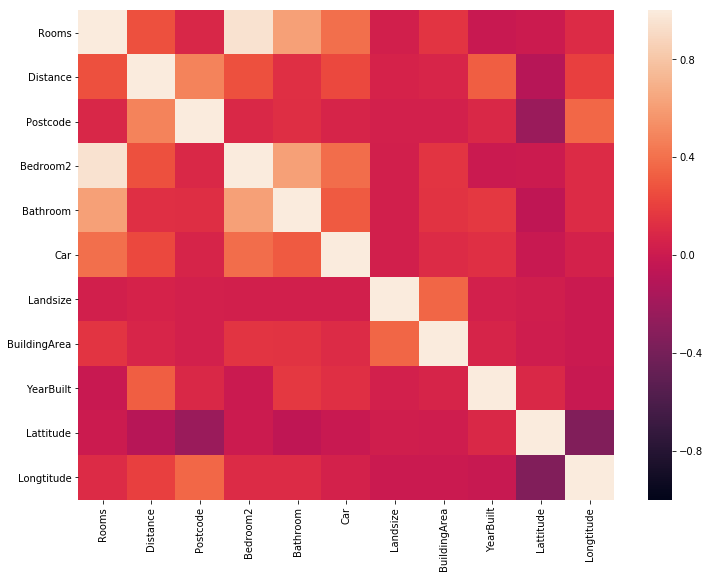

In [306]:
#correlation matrix
print(pre_X.corr())

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

#Creating a heatmap to check for any correlation between our independent variables
Xvar_heatmap = sns.heatmap(pre_X.corr(), vmin=-1, vmax=1)

print(Xvar_heatmap)

### The heatmap above clearly shows there is an issue of multicollinearity among the independent variables.

# PCA

In [307]:
# Normalize the data so that all variables have a mean of 0 and standard deviation
# o

X_scaled = StandardScaler().fit_transform(X_df)

C:\Users\sajee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sajee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [308]:
#Apply PCA

pca = PCA(.95)
X_pca = pca.fit_transform(X_scaled)

comp_no = pca.n_components_
comp_var_ratio = pca.explained_variance_ratio_

print(comp_no)
#print(comp_var_ratio)
#print(p_components)

339


In [309]:
#pca data to dataframe
pca_df = pd.DataFrame(data=X_pca)
print(pca_df.head())
print(pca_df.shape)

        0         1         2         3         4         5         6    \
0 -4.242696  1.605107  1.425243  2.982711  1.380026 -0.921023 -0.437875   
1 -4.137400  1.588143  1.430637  2.985047  1.358501 -0.899541 -0.395225   
2 -4.685844  1.831049  1.104124  2.997686  1.431020 -1.097160 -0.229371   
3 -3.024891  1.599255  1.757596  2.397270  0.553467 -0.175180 -0.673942   
4 -2.883066  1.122606  2.446058  2.902177  1.106017 -0.456238 -0.919094   

        7         8         9      ...          329       330       331  \
0 -0.091757  0.032152 -0.581851    ...     0.021726  0.013554 -0.031768   
1 -0.097896  0.019048 -0.503700    ...     0.021773  0.013588 -0.031481   
2 -0.084781  0.100567 -0.642259    ...     0.021446  0.013430 -0.030687   
3 -0.108243 -0.176868  0.103038    ...     0.021545  0.013325 -0.029952   
4 -0.016582 -0.017535 -0.465904    ...     0.021639  0.013636 -0.031018   

        332       333       334       335       336       337       338  
0  0.000202 -0.018891  0

In [312]:
#After applying PCA, I split the data into a second set of train and test groups

train_X_pca, test_X_pca, train_Y_pca, test_Y_pca = train_test_split(X_pca, log_Y, test_size=.35, random_state=20)

In [313]:
#initializing and fitting the ridge regression model, after pca

# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced. Note that by convention, the
# intercept is not regularized. Since we standardized the data
# earlier, the intercept should be equal to zero and can be dropped.

ridgeregr_pca = linear_model.Ridge(alpha=10, fit_intercept=False) 
ridgeregr_pca.fit(train_X_pca, train_Y_pca)
print('R squared: ', ridgeregr_pca.score(test_X_pca, test_Y_pca))
params_ridgeregr_pca = ridgeregr_pca.coef_
print(params_ridgeregr_pca)
print()
ridgeregr_cvs_pca = cross_val_score(ridgeregr_pca, X_df, log_Y, cv=10)
print(ridgeregr_cvs_pca)
print()
print('Average cross validated score of the ridge regression after PCA is: ', np.mean(ridgeregr_cvs_pca))

R squared:  -43181.94567585125
[-6.76221974e-02  1.43112683e-01  1.78971557e-01 -1.22106566e-01
 -1.89343585e-01 -2.61065775e-02 -2.46216750e-01 -1.04729255e-01
 -6.06420155e-01 -3.13702636e-01 -7.24879500e-02 -8.99534957e-02
 -1.99603896e-02 -1.89045988e-01 -2.86234249e-01  3.49416712e-02
 -1.31730992e-01 -1.12587472e-01 -6.72026337e-05 -6.53851475e-02
 -1.84479051e-02 -1.58969169e-01 -5.54808626e-02 -1.30738295e-01
 -8.94988712e-02  3.17002307e-02 -1.13845359e-01 -6.81207657e-02
 -1.17199478e-01 -3.81318057e-01  1.84328382e-01 -1.53767227e+00
 -4.11436250e-01 -1.54778566e-01 -1.36146153e-01 -1.82888354e-01
  4.18851538e-01  2.42108658e-02  2.94339341e-02 -6.88704375e-01
 -8.24518275e-02  1.31543817e+00  4.52428656e-02 -4.30022365e-01
 -5.45824606e-01  2.98862641e-01  8.95100465e-01  3.40514491e-01
  3.52438608e-01 -1.07051312e+00  1.26824885e+00  6.42570474e-01
  3.89173186e-01 -3.54664349e-01 -3.71573576e-01 -2.30427802e-01
  4.23891558e-01  1.28783740e-01  1.34037841e-01 -2.7956110

In [44]:
# perform grid search to find the optimal parameters for our random forest model, using the PCA dataset.
rforest = ensemble.RandomForestRegressor(random_state=30)
forest_param_grid = {'n_estimators':[50,100], 'max_depth':[8,10,12], 'min_samples_split':[20,25,35], 
                     'max_features':[15,25,35], 'criterion':['mse']}
rforest_grid = GridSearchCV(rforest, forest_param_grid, cv=10, verbose=3)
rforest_grid.fit(train_X_pca, train_Y_pca)
print('Best parameters for decision tree:', rforest_grid.best_params_)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
[CV] criterion=mse, max_depth=8, max_features=15, min_samples_split=20, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=mse, max_depth=8, max_features=15, min_samples_split=20, n_estimators=50, score=0.47000128547218006, total=   5.7s
[CV] criterion=mse, max_depth=8, max_features=15, min_samples_split=20, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.9s remaining:    0.0s


[CV]  criterion=mse, max_depth=8, max_features=15, min_samples_split=20, n_estimators=50, score=0.4692339956878434, total=   5.7s
[CV] criterion=mse, max_depth=8, max_features=15, min_samples_split=20, n_estimators=50 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.8s remaining:    0.0s


[CV]  criterion=mse, max_depth=8, max_features=15, min_samples_split=20, n_estimators=50, score=0.47747546924474804, total=   5.7s
[CV] criterion=mse, max_depth=8, max_features=15, min_samples_split=20, n_estimators=50 
[CV]  criterion=mse, max_depth=8, max_features=15, min_samples_split=20, n_estimators=50, score=0.4699108656424987, total=   5.7s
[CV] criterion=mse, max_depth=8, max_features=15, min_samples_split=20, n_estimators=50 
[CV]  criterion=mse, max_depth=8, max_features=15, min_samples_split=20, n_estimators=50, score=0.4724813797926621, total=   5.7s
[CV] criterion=mse, max_depth=8, max_features=15, min_samples_split=20, n_estimators=50 
[CV]  criterion=mse, max_depth=8, max_features=15, min_samples_split=20, n_estimators=50, score=0.47131723577920775, total=   5.7s
[CV] criterion=mse, max_depth=8, max_features=15, min_samples_split=20, n_estimators=50 
[CV]  criterion=mse, max_depth=8, max_features=15, min_samples_split=20, n_estimators=50, score=0.45434631080017696, total

[CV]  criterion=mse, max_depth=8, max_features=15, min_samples_split=35, n_estimators=50, score=0.47160705359388666, total=   5.7s
[CV] criterion=mse, max_depth=8, max_features=15, min_samples_split=35, n_estimators=50 
[CV]  criterion=mse, max_depth=8, max_features=15, min_samples_split=35, n_estimators=50, score=0.47318335486443497, total=   5.7s
[CV] criterion=mse, max_depth=8, max_features=15, min_samples_split=35, n_estimators=50 
[CV]  criterion=mse, max_depth=8, max_features=15, min_samples_split=35, n_estimators=50, score=0.4828243693459713, total=   5.7s
[CV] criterion=mse, max_depth=8, max_features=15, min_samples_split=35, n_estimators=50 
[CV]  criterion=mse, max_depth=8, max_features=15, min_samples_split=35, n_estimators=50, score=0.46532179244039795, total=   5.7s
[CV] criterion=mse, max_depth=8, max_features=15, min_samples_split=35, n_estimators=50 
[CV]  criterion=mse, max_depth=8, max_features=15, min_samples_split=35, n_estimators=50, score=0.4741551659612691, total

[CV]  criterion=mse, max_depth=8, max_features=25, min_samples_split=20, n_estimators=100, score=0.5046200455125965, total=  18.9s
[CV] criterion=mse, max_depth=8, max_features=25, min_samples_split=20, n_estimators=100 
[CV]  criterion=mse, max_depth=8, max_features=25, min_samples_split=20, n_estimators=100, score=0.4977418607751247, total=  18.9s
[CV] criterion=mse, max_depth=8, max_features=25, min_samples_split=25, n_estimators=50 
[CV]  criterion=mse, max_depth=8, max_features=25, min_samples_split=25, n_estimators=50, score=0.4896596389070416, total=   9.5s
[CV] criterion=mse, max_depth=8, max_features=25, min_samples_split=25, n_estimators=50 
[CV]  criterion=mse, max_depth=8, max_features=25, min_samples_split=25, n_estimators=50, score=0.4971508751709417, total=   9.4s
[CV] criterion=mse, max_depth=8, max_features=25, min_samples_split=25, n_estimators=50 
[CV]  criterion=mse, max_depth=8, max_features=25, min_samples_split=25, n_estimators=50, score=0.5088928568174957, total

[CV]  criterion=mse, max_depth=8, max_features=25, min_samples_split=35, n_estimators=100, score=0.4808263085984306, total=  18.9s
[CV] criterion=mse, max_depth=8, max_features=25, min_samples_split=35, n_estimators=100 
[CV]  criterion=mse, max_depth=8, max_features=25, min_samples_split=35, n_estimators=100, score=0.5058304867725022, total=  18.9s
[CV] criterion=mse, max_depth=8, max_features=25, min_samples_split=35, n_estimators=100 
[CV]  criterion=mse, max_depth=8, max_features=25, min_samples_split=35, n_estimators=100, score=0.5028170377118368, total=  19.0s
[CV] criterion=mse, max_depth=8, max_features=25, min_samples_split=35, n_estimators=100 
[CV]  criterion=mse, max_depth=8, max_features=25, min_samples_split=35, n_estimators=100, score=0.49715805776701905, total=  18.8s
[CV] criterion=mse, max_depth=8, max_features=35, min_samples_split=20, n_estimators=50 
[CV]  criterion=mse, max_depth=8, max_features=35, min_samples_split=20, n_estimators=50, score=0.5036219500108068, 

[CV]  criterion=mse, max_depth=8, max_features=35, min_samples_split=25, n_estimators=100, score=0.5163513132482289, total=  26.2s
[CV] criterion=mse, max_depth=8, max_features=35, min_samples_split=25, n_estimators=100 
[CV]  criterion=mse, max_depth=8, max_features=35, min_samples_split=25, n_estimators=100, score=0.5155365327084593, total=  26.2s
[CV] criterion=mse, max_depth=8, max_features=35, min_samples_split=25, n_estimators=100 
[CV]  criterion=mse, max_depth=8, max_features=35, min_samples_split=25, n_estimators=100, score=0.4988642493861878, total=  26.1s
[CV] criterion=mse, max_depth=8, max_features=35, min_samples_split=25, n_estimators=100 
[CV]  criterion=mse, max_depth=8, max_features=35, min_samples_split=25, n_estimators=100, score=0.5212703090401674, total=  26.5s
[CV] criterion=mse, max_depth=8, max_features=35, min_samples_split=25, n_estimators=100 
[CV]  criterion=mse, max_depth=8, max_features=35, min_samples_split=25, n_estimators=100, score=0.5219020755025561,

[CV]  criterion=mse, max_depth=10, max_features=15, min_samples_split=20, n_estimators=100, score=0.5211049574780544, total=  13.6s
[CV] criterion=mse, max_depth=10, max_features=15, min_samples_split=20, n_estimators=100 
[CV]  criterion=mse, max_depth=10, max_features=15, min_samples_split=20, n_estimators=100, score=0.5125576572332159, total=  13.5s
[CV] criterion=mse, max_depth=10, max_features=15, min_samples_split=20, n_estimators=100 
[CV]  criterion=mse, max_depth=10, max_features=15, min_samples_split=20, n_estimators=100, score=0.5178738165082202, total=  13.6s
[CV] criterion=mse, max_depth=10, max_features=15, min_samples_split=20, n_estimators=100 
[CV]  criterion=mse, max_depth=10, max_features=15, min_samples_split=20, n_estimators=100, score=0.5092739064705525, total=  13.5s
[CV] criterion=mse, max_depth=10, max_features=15, min_samples_split=20, n_estimators=100 
[CV]  criterion=mse, max_depth=10, max_features=15, min_samples_split=20, n_estimators=100, score=0.49389160

[CV]  criterion=mse, max_depth=10, max_features=15, min_samples_split=35, n_estimators=50, score=0.5062140796913166, total=   6.7s
[CV] criterion=mse, max_depth=10, max_features=15, min_samples_split=35, n_estimators=100 
[CV]  criterion=mse, max_depth=10, max_features=15, min_samples_split=35, n_estimators=100, score=0.5011363243745393, total=  13.4s
[CV] criterion=mse, max_depth=10, max_features=15, min_samples_split=35, n_estimators=100 
[CV]  criterion=mse, max_depth=10, max_features=15, min_samples_split=35, n_estimators=100, score=0.5132753481502366, total=  13.4s
[CV] criterion=mse, max_depth=10, max_features=15, min_samples_split=35, n_estimators=100 
[CV]  criterion=mse, max_depth=10, max_features=15, min_samples_split=35, n_estimators=100, score=0.5195571812982257, total=  13.4s
[CV] criterion=mse, max_depth=10, max_features=15, min_samples_split=35, n_estimators=100 
[CV]  criterion=mse, max_depth=10, max_features=15, min_samples_split=35, n_estimators=100, score=0.510352464

[CV]  criterion=mse, max_depth=10, max_features=25, min_samples_split=25, n_estimators=50, score=0.5178627101241642, total=  11.0s
[CV] criterion=mse, max_depth=10, max_features=25, min_samples_split=25, n_estimators=50 
[CV]  criterion=mse, max_depth=10, max_features=25, min_samples_split=25, n_estimators=50, score=0.5291341163818319, total=  11.1s
[CV] criterion=mse, max_depth=10, max_features=25, min_samples_split=25, n_estimators=50 
[CV]  criterion=mse, max_depth=10, max_features=25, min_samples_split=25, n_estimators=50, score=0.5340346896676464, total=  11.0s
[CV] criterion=mse, max_depth=10, max_features=25, min_samples_split=25, n_estimators=50 
[CV]  criterion=mse, max_depth=10, max_features=25, min_samples_split=25, n_estimators=50, score=0.5261249535309085, total=  11.1s
[CV] criterion=mse, max_depth=10, max_features=25, min_samples_split=25, n_estimators=100 
[CV]  criterion=mse, max_depth=10, max_features=25, min_samples_split=25, n_estimators=100, score=0.519050439750905

[CV]  criterion=mse, max_depth=10, max_features=35, min_samples_split=20, n_estimators=50, score=0.5435298683474277, total=  15.4s
[CV] criterion=mse, max_depth=10, max_features=35, min_samples_split=20, n_estimators=50 
[CV]  criterion=mse, max_depth=10, max_features=35, min_samples_split=20, n_estimators=50, score=0.5428048813670661, total=  15.4s
[CV] criterion=mse, max_depth=10, max_features=35, min_samples_split=20, n_estimators=50 
[CV]  criterion=mse, max_depth=10, max_features=35, min_samples_split=20, n_estimators=50, score=0.5435491090687031, total=  15.5s
[CV] criterion=mse, max_depth=10, max_features=35, min_samples_split=20, n_estimators=50 
[CV]  criterion=mse, max_depth=10, max_features=35, min_samples_split=20, n_estimators=50, score=0.5210514336324337, total=  15.4s
[CV] criterion=mse, max_depth=10, max_features=35, min_samples_split=20, n_estimators=50 
[CV]  criterion=mse, max_depth=10, max_features=35, min_samples_split=20, n_estimators=50, score=0.538071164502479, 

[CV]  criterion=mse, max_depth=10, max_features=35, min_samples_split=35, n_estimators=50, score=0.5267889687654539, total=  15.4s
[CV] criterion=mse, max_depth=10, max_features=35, min_samples_split=35, n_estimators=50 
[CV]  criterion=mse, max_depth=10, max_features=35, min_samples_split=35, n_estimators=50, score=0.5361746755929846, total=  15.3s
[CV] criterion=mse, max_depth=10, max_features=35, min_samples_split=35, n_estimators=50 
[CV]  criterion=mse, max_depth=10, max_features=35, min_samples_split=35, n_estimators=50, score=0.5411862250775299, total=  15.3s
[CV] criterion=mse, max_depth=10, max_features=35, min_samples_split=35, n_estimators=50 
[CV]  criterion=mse, max_depth=10, max_features=35, min_samples_split=35, n_estimators=50, score=0.5412897998484514, total=  15.3s
[CV] criterion=mse, max_depth=10, max_features=35, min_samples_split=35, n_estimators=50 
[CV]  criterion=mse, max_depth=10, max_features=35, min_samples_split=35, n_estimators=50, score=0.5375369225348927,

[CV]  criterion=mse, max_depth=12, max_features=15, min_samples_split=20, n_estimators=100, score=0.5328755342172398, total=  15.2s
[CV] criterion=mse, max_depth=12, max_features=15, min_samples_split=20, n_estimators=100 
[CV]  criterion=mse, max_depth=12, max_features=15, min_samples_split=20, n_estimators=100, score=0.5424952451176139, total=  15.2s
[CV] criterion=mse, max_depth=12, max_features=15, min_samples_split=20, n_estimators=100 
[CV]  criterion=mse, max_depth=12, max_features=15, min_samples_split=20, n_estimators=100, score=0.5309742971827187, total=  15.2s
[CV] criterion=mse, max_depth=12, max_features=15, min_samples_split=25, n_estimators=50 
[CV]  criterion=mse, max_depth=12, max_features=15, min_samples_split=25, n_estimators=50, score=0.5175047118747802, total=   7.5s
[CV] criterion=mse, max_depth=12, max_features=15, min_samples_split=25, n_estimators=50 
[CV]  criterion=mse, max_depth=12, max_features=15, min_samples_split=25, n_estimators=50, score=0.528276446790

[CV]  criterion=mse, max_depth=12, max_features=15, min_samples_split=35, n_estimators=100, score=0.5357657100177668, total=  15.0s
[CV] criterion=mse, max_depth=12, max_features=15, min_samples_split=35, n_estimators=100 
[CV]  criterion=mse, max_depth=12, max_features=15, min_samples_split=35, n_estimators=100, score=0.5268090527993546, total=  15.0s
[CV] criterion=mse, max_depth=12, max_features=15, min_samples_split=35, n_estimators=100 
[CV]  criterion=mse, max_depth=12, max_features=15, min_samples_split=35, n_estimators=100, score=0.5170824401049384, total=  15.0s
[CV] criterion=mse, max_depth=12, max_features=15, min_samples_split=35, n_estimators=100 
[CV]  criterion=mse, max_depth=12, max_features=15, min_samples_split=35, n_estimators=100, score=0.532174454150783, total=  15.0s
[CV] criterion=mse, max_depth=12, max_features=15, min_samples_split=35, n_estimators=100 
[CV]  criterion=mse, max_depth=12, max_features=15, min_samples_split=35, n_estimators=100, score=0.541157485

[CV]  criterion=mse, max_depth=12, max_features=25, min_samples_split=25, n_estimators=100, score=0.544197329339147, total=  24.8s
[CV] criterion=mse, max_depth=12, max_features=25, min_samples_split=25, n_estimators=100 
[CV]  criterion=mse, max_depth=12, max_features=25, min_samples_split=25, n_estimators=100, score=0.5496487966856151, total=  24.9s
[CV] criterion=mse, max_depth=12, max_features=25, min_samples_split=25, n_estimators=100 
[CV]  criterion=mse, max_depth=12, max_features=25, min_samples_split=25, n_estimators=100, score=0.5486991331174514, total=  24.7s
[CV] criterion=mse, max_depth=12, max_features=25, min_samples_split=25, n_estimators=100 
[CV]  criterion=mse, max_depth=12, max_features=25, min_samples_split=25, n_estimators=100, score=0.5490418494642726, total=  24.9s
[CV] criterion=mse, max_depth=12, max_features=25, min_samples_split=25, n_estimators=100 
[CV]  criterion=mse, max_depth=12, max_features=25, min_samples_split=25, n_estimators=100, score=0.544909450

[CV]  criterion=mse, max_depth=12, max_features=35, min_samples_split=20, n_estimators=50, score=0.5581394121459211, total=  17.4s
[CV] criterion=mse, max_depth=12, max_features=35, min_samples_split=20, n_estimators=50 
[CV]  criterion=mse, max_depth=12, max_features=35, min_samples_split=20, n_estimators=50, score=0.5505610573804223, total=  17.4s
[CV] criterion=mse, max_depth=12, max_features=35, min_samples_split=20, n_estimators=100 
[CV]  criterion=mse, max_depth=12, max_features=35, min_samples_split=20, n_estimators=100, score=0.5383080426644282, total=  34.7s
[CV] criterion=mse, max_depth=12, max_features=35, min_samples_split=20, n_estimators=100 
[CV]  criterion=mse, max_depth=12, max_features=35, min_samples_split=20, n_estimators=100, score=0.5520158981213799, total=  34.7s
[CV] criterion=mse, max_depth=12, max_features=35, min_samples_split=20, n_estimators=100 
[CV]  criterion=mse, max_depth=12, max_features=35, min_samples_split=20, n_estimators=100, score=0.55453512244

[CV]  criterion=mse, max_depth=12, max_features=35, min_samples_split=35, n_estimators=50, score=0.5511604271118322, total=  17.0s
[CV] criterion=mse, max_depth=12, max_features=35, min_samples_split=35, n_estimators=50 
[CV]  criterion=mse, max_depth=12, max_features=35, min_samples_split=35, n_estimators=50, score=0.5353240886337656, total=  17.1s
[CV] criterion=mse, max_depth=12, max_features=35, min_samples_split=35, n_estimators=50 
[CV]  criterion=mse, max_depth=12, max_features=35, min_samples_split=35, n_estimators=50, score=0.5443827788819549, total=  17.4s
[CV] criterion=mse, max_depth=12, max_features=35, min_samples_split=35, n_estimators=50 
[CV]  criterion=mse, max_depth=12, max_features=35, min_samples_split=35, n_estimators=50, score=0.5519348068149015, total=  17.2s
[CV] criterion=mse, max_depth=12, max_features=35, min_samples_split=35, n_estimators=50 
[CV]  criterion=mse, max_depth=12, max_features=35, min_samples_split=35, n_estimators=50, score=0.548881624632831, 

[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed: 151.2min finished


Best parameters for decision tree: {'criterion': 'mse', 'max_depth': 12, 'max_features': 35, 'min_samples_split': 20, 'n_estimators': 100}


In [45]:
print(rforest_grid.best_score_)

0.5511219421477271


In [311]:
#initializing and fitting random forest model, after PCA and gridsearchcv

#set start time
start_time_rforest = datetime.datetime.now()

#initialize and fit the the first random forest regression model using full data.
forest_regr = ensemble.RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=12, max_features=35,
                                              min_samples_split=20)
forest_regr.fit(train_X_pca, train_Y_pca)

# Classify, storing the result in a new variable.
#y_pred_rforest = forest_regr.predict(test_X)

#get accuracy score from our model
print('R squared for Random Forest regression Model: ', forest_regr.score(test_X_pca, test_Y_pca))

#calculate end time
end_time_rforest = datetime.datetime.now()


#get average accuracy score of our random forest through cross validation
rforest_cvs = cross_val_score(forest_regr, X_df, Y, cv=10)
print(rforest_cvs)
print('Average cross validated R squared from our Random Forest Model is: ' + str(np.mean(rforest_cvs)))

R squared for Random Forest regression Model:  0.5476213634718752
[0.48578775 0.48873191 0.41456116 0.46843807 0.49303714 0.53041464
 0.54400953 0.50042598 0.41867755 0.50828312]
Average cross validated R squared from our Random Forest Model is: 0.4852366838050581


In [49]:
# perform grid search to find the optimal parameters for our Gradient Boosting model, using the PCA dataset.
Gboost = ensemble.GradientBoostingRegressor(random_state=20)
Gboost_param_grid = {'n_estimators':[150,200], 'max_depth':[10,12,16], 'min_samples_split':[20,25,35], 
                     'max_features':[25,35,55], 'criterion':['mse']}
Gboost_grid = GridSearchCV(Gboost, Gboost_param_grid, cv=10, verbose=3)
Gboost_grid.fit(train_X_pca, train_Y_pca)
print('Best parameters for decision tree:', Gboost_grid.best_params_)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
[CV] criterion=mse, max_depth=10, max_features=25, min_samples_split=20, n_estimators=150 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=mse, max_depth=10, max_features=25, min_samples_split=20, n_estimators=150, score=0.5327922241063339, total=  26.1s
[CV] criterion=mse, max_depth=10, max_features=25, min_samples_split=20, n_estimators=150 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   26.4s remaining:    0.0s


[CV]  criterion=mse, max_depth=10, max_features=25, min_samples_split=20, n_estimators=150, score=0.5655145415520788, total=  26.4s
[CV] criterion=mse, max_depth=10, max_features=25, min_samples_split=20, n_estimators=150 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   53.2s remaining:    0.0s


[CV]  criterion=mse, max_depth=10, max_features=25, min_samples_split=20, n_estimators=150, score=0.5464342480399015, total=  26.2s
[CV] criterion=mse, max_depth=10, max_features=25, min_samples_split=20, n_estimators=150 
[CV]  criterion=mse, max_depth=10, max_features=25, min_samples_split=20, n_estimators=150, score=0.5622099390206552, total=  26.1s
[CV] criterion=mse, max_depth=10, max_features=25, min_samples_split=20, n_estimators=150 
[CV]  criterion=mse, max_depth=10, max_features=25, min_samples_split=20, n_estimators=150, score=0.5563735730748229, total=  26.4s
[CV] criterion=mse, max_depth=10, max_features=25, min_samples_split=20, n_estimators=150 
[CV]  criterion=mse, max_depth=10, max_features=25, min_samples_split=20, n_estimators=150, score=0.540733505678723, total=  26.3s
[CV] criterion=mse, max_depth=10, max_features=25, min_samples_split=20, n_estimators=150 
[CV]  criterion=mse, max_depth=10, max_features=25, min_samples_split=20, n_estimators=150, score=0.545111806

[CV]  criterion=mse, max_depth=10, max_features=25, min_samples_split=25, n_estimators=200, score=0.5478214145372926, total=  32.9s
[CV] criterion=mse, max_depth=10, max_features=25, min_samples_split=35, n_estimators=150 
[CV]  criterion=mse, max_depth=10, max_features=25, min_samples_split=35, n_estimators=150, score=0.538612278141286, total=  25.4s
[CV] criterion=mse, max_depth=10, max_features=25, min_samples_split=35, n_estimators=150 
[CV]  criterion=mse, max_depth=10, max_features=25, min_samples_split=35, n_estimators=150, score=0.5576539933257214, total=  25.4s
[CV] criterion=mse, max_depth=10, max_features=25, min_samples_split=35, n_estimators=150 
[CV]  criterion=mse, max_depth=10, max_features=25, min_samples_split=35, n_estimators=150, score=0.5554930653182276, total=  25.5s
[CV] criterion=mse, max_depth=10, max_features=25, min_samples_split=35, n_estimators=150 
[CV]  criterion=mse, max_depth=10, max_features=25, min_samples_split=35, n_estimators=150, score=0.568898442

[CV]  criterion=mse, max_depth=10, max_features=35, min_samples_split=20, n_estimators=200, score=0.5341981696417635, total=  45.2s
[CV] criterion=mse, max_depth=10, max_features=35, min_samples_split=20, n_estimators=200 
[CV]  criterion=mse, max_depth=10, max_features=35, min_samples_split=20, n_estimators=200, score=0.5257004748028298, total=  45.7s
[CV] criterion=mse, max_depth=10, max_features=35, min_samples_split=20, n_estimators=200 
[CV]  criterion=mse, max_depth=10, max_features=35, min_samples_split=20, n_estimators=200, score=0.5662911976816429, total=  45.9s
[CV] criterion=mse, max_depth=10, max_features=35, min_samples_split=20, n_estimators=200 
[CV]  criterion=mse, max_depth=10, max_features=35, min_samples_split=20, n_estimators=200, score=0.540307097112126, total=  45.8s
[CV] criterion=mse, max_depth=10, max_features=35, min_samples_split=25, n_estimators=150 
[CV]  criterion=mse, max_depth=10, max_features=35, min_samples_split=25, n_estimators=150, score=0.535325964

[CV]  criterion=mse, max_depth=10, max_features=35, min_samples_split=35, n_estimators=200, score=0.5617727344031499, total=  44.6s
[CV] criterion=mse, max_depth=10, max_features=35, min_samples_split=35, n_estimators=200 
[CV]  criterion=mse, max_depth=10, max_features=35, min_samples_split=35, n_estimators=200, score=0.5568532198338688, total=  44.1s
[CV] criterion=mse, max_depth=10, max_features=35, min_samples_split=35, n_estimators=200 
[CV]  criterion=mse, max_depth=10, max_features=35, min_samples_split=35, n_estimators=200, score=0.547467887656878, total=  44.5s
[CV] criterion=mse, max_depth=10, max_features=35, min_samples_split=35, n_estimators=200 
[CV]  criterion=mse, max_depth=10, max_features=35, min_samples_split=35, n_estimators=200, score=0.5395870946460346, total=  44.6s
[CV] criterion=mse, max_depth=10, max_features=35, min_samples_split=35, n_estimators=200 
[CV]  criterion=mse, max_depth=10, max_features=35, min_samples_split=35, n_estimators=200, score=0.544543263

[CV]  criterion=mse, max_depth=10, max_features=55, min_samples_split=25, n_estimators=200, score=0.534248375066932, total= 1.1min
[CV] criterion=mse, max_depth=10, max_features=55, min_samples_split=25, n_estimators=200 
[CV]  criterion=mse, max_depth=10, max_features=55, min_samples_split=25, n_estimators=200, score=0.552089301075563, total= 1.2min
[CV] criterion=mse, max_depth=10, max_features=55, min_samples_split=25, n_estimators=200 
[CV]  criterion=mse, max_depth=10, max_features=55, min_samples_split=25, n_estimators=200, score=0.544335789093386, total= 1.2min
[CV] criterion=mse, max_depth=10, max_features=55, min_samples_split=25, n_estimators=200 
[CV]  criterion=mse, max_depth=10, max_features=55, min_samples_split=25, n_estimators=200, score=0.5584464837696722, total= 1.2min
[CV] criterion=mse, max_depth=10, max_features=55, min_samples_split=25, n_estimators=200 
[CV]  criterion=mse, max_depth=10, max_features=55, min_samples_split=25, n_estimators=200, score=0.55636002057

[CV]  criterion=mse, max_depth=12, max_features=25, min_samples_split=20, n_estimators=150, score=0.5229841615844735, total=  33.4s
[CV] criterion=mse, max_depth=12, max_features=25, min_samples_split=20, n_estimators=150 
[CV]  criterion=mse, max_depth=12, max_features=25, min_samples_split=20, n_estimators=150, score=0.5483433761631356, total=  33.9s
[CV] criterion=mse, max_depth=12, max_features=25, min_samples_split=20, n_estimators=150 
[CV]  criterion=mse, max_depth=12, max_features=25, min_samples_split=20, n_estimators=150, score=0.537505508730787, total=  33.7s
[CV] criterion=mse, max_depth=12, max_features=25, min_samples_split=20, n_estimators=200 
[CV]  criterion=mse, max_depth=12, max_features=25, min_samples_split=20, n_estimators=200, score=0.5151967205025099, total=  42.3s
[CV] criterion=mse, max_depth=12, max_features=25, min_samples_split=20, n_estimators=200 
[CV]  criterion=mse, max_depth=12, max_features=25, min_samples_split=20, n_estimators=200, score=0.545248968

[CV]  criterion=mse, max_depth=12, max_features=25, min_samples_split=35, n_estimators=150, score=0.5499409832722302, total=  31.8s
[CV] criterion=mse, max_depth=12, max_features=25, min_samples_split=35, n_estimators=150 
[CV]  criterion=mse, max_depth=12, max_features=25, min_samples_split=35, n_estimators=150, score=0.5412045548956421, total=  32.0s
[CV] criterion=mse, max_depth=12, max_features=25, min_samples_split=35, n_estimators=150 
[CV]  criterion=mse, max_depth=12, max_features=25, min_samples_split=35, n_estimators=150, score=0.526652912602522, total=  32.0s
[CV] criterion=mse, max_depth=12, max_features=25, min_samples_split=35, n_estimators=150 
[CV]  criterion=mse, max_depth=12, max_features=25, min_samples_split=35, n_estimators=150, score=0.5226515734644724, total=  31.9s
[CV] criterion=mse, max_depth=12, max_features=25, min_samples_split=35, n_estimators=150 
[CV]  criterion=mse, max_depth=12, max_features=25, min_samples_split=35, n_estimators=150, score=0.552929644

[CV]  criterion=mse, max_depth=12, max_features=35, min_samples_split=25, n_estimators=150, score=0.5519785913913351, total=  44.7s
[CV] criterion=mse, max_depth=12, max_features=35, min_samples_split=25, n_estimators=150 
[CV]  criterion=mse, max_depth=12, max_features=35, min_samples_split=25, n_estimators=150, score=0.541663020059477, total=  44.9s
[CV] criterion=mse, max_depth=12, max_features=35, min_samples_split=25, n_estimators=150 
[CV]  criterion=mse, max_depth=12, max_features=35, min_samples_split=25, n_estimators=150, score=0.5511671287043738, total=  45.0s
[CV] criterion=mse, max_depth=12, max_features=35, min_samples_split=25, n_estimators=150 
[CV]  criterion=mse, max_depth=12, max_features=35, min_samples_split=25, n_estimators=150, score=0.5576077204261797, total=  44.5s
[CV] criterion=mse, max_depth=12, max_features=35, min_samples_split=25, n_estimators=150 
[CV]  criterion=mse, max_depth=12, max_features=35, min_samples_split=25, n_estimators=150, score=0.533583496

[CV]  criterion=mse, max_depth=12, max_features=35, min_samples_split=35, n_estimators=200, score=0.5471002578778108, total=  55.2s
[CV] criterion=mse, max_depth=12, max_features=35, min_samples_split=35, n_estimators=200 
[CV]  criterion=mse, max_depth=12, max_features=35, min_samples_split=35, n_estimators=200, score=0.5351984873789106, total=  55.2s
[CV] criterion=mse, max_depth=12, max_features=55, min_samples_split=20, n_estimators=150 
[CV]  criterion=mse, max_depth=12, max_features=55, min_samples_split=20, n_estimators=150, score=0.521257118282728, total= 1.2min
[CV] criterion=mse, max_depth=12, max_features=55, min_samples_split=20, n_estimators=150 
[CV]  criterion=mse, max_depth=12, max_features=55, min_samples_split=20, n_estimators=150, score=0.5507584574157982, total= 1.2min
[CV] criterion=mse, max_depth=12, max_features=55, min_samples_split=20, n_estimators=150 
[CV]  criterion=mse, max_depth=12, max_features=55, min_samples_split=20, n_estimators=150, score=0.531476013

[CV]  criterion=mse, max_depth=12, max_features=55, min_samples_split=25, n_estimators=200, score=0.5442521476482665, total= 1.5min
[CV] criterion=mse, max_depth=12, max_features=55, min_samples_split=25, n_estimators=200 
[CV]  criterion=mse, max_depth=12, max_features=55, min_samples_split=25, n_estimators=200, score=0.5249908048476248, total= 1.5min
[CV] criterion=mse, max_depth=12, max_features=55, min_samples_split=25, n_estimators=200 
[CV]  criterion=mse, max_depth=12, max_features=55, min_samples_split=25, n_estimators=200, score=0.5222467063384457, total= 1.5min
[CV] criterion=mse, max_depth=12, max_features=55, min_samples_split=25, n_estimators=200 
[CV]  criterion=mse, max_depth=12, max_features=55, min_samples_split=25, n_estimators=200, score=0.5551124096664632, total= 1.5min
[CV] criterion=mse, max_depth=12, max_features=55, min_samples_split=25, n_estimators=200 
[CV]  criterion=mse, max_depth=12, max_features=55, min_samples_split=25, n_estimators=200, score=0.53018034

[CV]  criterion=mse, max_depth=16, max_features=25, min_samples_split=20, n_estimators=200, score=0.5132608588210505, total= 1.0min
[CV] criterion=mse, max_depth=16, max_features=25, min_samples_split=20, n_estimators=200 
[CV]  criterion=mse, max_depth=16, max_features=25, min_samples_split=20, n_estimators=200, score=0.5283147014795091, total= 1.0min
[CV] criterion=mse, max_depth=16, max_features=25, min_samples_split=20, n_estimators=200 
[CV]  criterion=mse, max_depth=16, max_features=25, min_samples_split=20, n_estimators=200, score=0.5295483159843459, total= 1.0min
[CV] criterion=mse, max_depth=16, max_features=25, min_samples_split=20, n_estimators=200 
[CV]  criterion=mse, max_depth=16, max_features=25, min_samples_split=20, n_estimators=200, score=0.512895201765893, total= 1.0min
[CV] criterion=mse, max_depth=16, max_features=25, min_samples_split=20, n_estimators=200 
[CV]  criterion=mse, max_depth=16, max_features=25, min_samples_split=20, n_estimators=200, score=0.505097768

[CV]  criterion=mse, max_depth=16, max_features=25, min_samples_split=35, n_estimators=150, score=0.521445139198424, total=  45.1s
[CV] criterion=mse, max_depth=16, max_features=25, min_samples_split=35, n_estimators=200 
[CV]  criterion=mse, max_depth=16, max_features=25, min_samples_split=35, n_estimators=200, score=0.49926628367158254, total=  56.8s
[CV] criterion=mse, max_depth=16, max_features=25, min_samples_split=35, n_estimators=200 
[CV]  criterion=mse, max_depth=16, max_features=25, min_samples_split=35, n_estimators=200, score=0.5325111685528521, total=  57.0s
[CV] criterion=mse, max_depth=16, max_features=25, min_samples_split=35, n_estimators=200 
[CV]  criterion=mse, max_depth=16, max_features=25, min_samples_split=35, n_estimators=200, score=0.5329004656713245, total=  56.0s
[CV] criterion=mse, max_depth=16, max_features=25, min_samples_split=35, n_estimators=200 
[CV]  criterion=mse, max_depth=16, max_features=25, min_samples_split=35, n_estimators=200, score=0.54071244

[CV]  criterion=mse, max_depth=16, max_features=35, min_samples_split=25, n_estimators=150, score=0.5110351398594579, total= 1.1min
[CV] criterion=mse, max_depth=16, max_features=35, min_samples_split=25, n_estimators=150 
[CV]  criterion=mse, max_depth=16, max_features=35, min_samples_split=25, n_estimators=150, score=0.50609495801206, total= 1.1min
[CV] criterion=mse, max_depth=16, max_features=35, min_samples_split=25, n_estimators=150 
[CV]  criterion=mse, max_depth=16, max_features=35, min_samples_split=25, n_estimators=150, score=0.5416337096168867, total= 1.1min
[CV] criterion=mse, max_depth=16, max_features=35, min_samples_split=25, n_estimators=150 
[CV]  criterion=mse, max_depth=16, max_features=35, min_samples_split=25, n_estimators=150, score=0.5123840131103867, total= 1.1min
[CV] criterion=mse, max_depth=16, max_features=35, min_samples_split=25, n_estimators=200 
[CV]  criterion=mse, max_depth=16, max_features=35, min_samples_split=25, n_estimators=200, score=0.5070596175

[CV]  criterion=mse, max_depth=16, max_features=55, min_samples_split=20, n_estimators=150, score=0.5261891938590846, total= 1.8min
[CV] criterion=mse, max_depth=16, max_features=55, min_samples_split=20, n_estimators=150 
[CV]  criterion=mse, max_depth=16, max_features=55, min_samples_split=20, n_estimators=150, score=0.5316565019794517, total= 1.8min
[CV] criterion=mse, max_depth=16, max_features=55, min_samples_split=20, n_estimators=150 
[CV]  criterion=mse, max_depth=16, max_features=55, min_samples_split=20, n_estimators=150, score=0.5144548605918722, total= 1.8min
[CV] criterion=mse, max_depth=16, max_features=55, min_samples_split=20, n_estimators=150 
[CV]  criterion=mse, max_depth=16, max_features=55, min_samples_split=20, n_estimators=150, score=0.5013010337624166, total= 1.8min
[CV] criterion=mse, max_depth=16, max_features=55, min_samples_split=20, n_estimators=150 
[CV]  criterion=mse, max_depth=16, max_features=55, min_samples_split=20, n_estimators=150, score=0.50561707

[CV]  criterion=mse, max_depth=16, max_features=55, min_samples_split=35, n_estimators=150, score=0.5058099180769169, total= 1.6min
[CV] criterion=mse, max_depth=16, max_features=55, min_samples_split=35, n_estimators=150 
[CV]  criterion=mse, max_depth=16, max_features=55, min_samples_split=35, n_estimators=150, score=0.533243768644394, total= 1.6min
[CV] criterion=mse, max_depth=16, max_features=55, min_samples_split=35, n_estimators=150 
[CV]  criterion=mse, max_depth=16, max_features=55, min_samples_split=35, n_estimators=150, score=0.5188868970789478, total= 1.6min
[CV] criterion=mse, max_depth=16, max_features=55, min_samples_split=35, n_estimators=150 
[CV]  criterion=mse, max_depth=16, max_features=55, min_samples_split=35, n_estimators=150, score=0.5344336052302221, total= 1.6min
[CV] criterion=mse, max_depth=16, max_features=55, min_samples_split=35, n_estimators=150 
[CV]  criterion=mse, max_depth=16, max_features=55, min_samples_split=35, n_estimators=150, score=0.543406185

[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed: 543.0min finished


Best parameters for decision tree: {'criterion': 'mse', 'max_depth': 10, 'max_features': 55, 'min_samples_split': 35, 'n_estimators': 150}


In [50]:
print(Gboost_grid.best_score_)

0.554974467430881


In [ ]:
#initializing and fitting Gradient Boosting model, after PCA and gridsearchcv

#set start time
start_time_rforest = datetime.datetime.now()

#initialize and fit the the first random forest regression model using full data.
forest_regr = ensemble.GradientBoostingRegressor()
forest_regr.fit(train_X_pca, train_Y_pca)

# Classify, storing the result in a new variable.
#y_pred_rforest = forest_regr.predict(test_X)

#get accuracy score from our model
print('R squared for Gradient Boosting regression Model: ', forest_regr.score(test_X, test_Y))

#calculate end time
end_time_rforest = datetime.datetime.now()

print('Duration: ', + str(end_time_rforest - start_time_rforest))

#get average accuracy score of our random forest through cross validation
rforest_cvs = cross_val_score(forest_regr, X_df, Y, cv=10)
print(rforest_cvs)
print('Average cross validated R squared from our Gradient Boosting Regression Model is: ' + str(np.mean(rforest_cvs)))

In [ ]:
#print(X_df.Regionname.value_counts(dropna=False))
#converting the categorical values in regionname to numerical

#X['Regionname'] = X["Regionname"].map({'Southern Metropolitan':1, "Northern Metropolitan":2, "Western Metropolitan":3,
#                                       "Eastern Metropolitan":4, "South-Eastern Metropolitan":5, "Eastern Victoria":6,
#                                        "Northern Victoria":7, "Western Victoria":8})
#print(X['Regionname'])
print(X_df.head())

In [ ]:
# Instantiate our model.
basic_regr = linear_model.LinearRegression()
basic_regr.fit(train_X, train_Y)

print('R squared for basic regression Model: ', basic_regr.score(test_X, test_Y))


#get average accuracy score of our random forest through cross validation
basic_regr_cvs = cross_val_score(basic_regr, X_df, Y, cv=10)
print(basic_regr_cvs)
print('Average cross validated R squared from our basic regression Model is: ' + str(np.mean(basic_regr_cvs)))

In [ ]:
#initializing the first simple model, before preprocessing our data

#set start time
start_time_rforest = datetime.datetime.now()

#initialize and fit the the first random forest regression model using full data.
forest_regr = ensemble.RandomForestRegressor()
forest_regr.fit(train_X, train_Y)

# Classify, storing the result in a new variable.
#y_pred_rforest = forest_regr.predict(test_X)

#get accuracy score from our model
print('R squared for Random Forest regression Model: ', forest_regr.score(test_X, test_Y))

#calculate end time
end_time_rforest = datetime.datetime.now()

#get average accuracy score of our random forest through cross validation
rforest_cvs = cross_val_score(forest_regr, X_df, Y, cv=10)
print(rforest_cvs)
print('Average cross validated R squared from our Random Forest Model is: ' + str(np.mean(rforest_cvs)))